# Project Name: House Price Prediction using Regression Techniques

Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Lifecycle of a Data Analytics Project
1. Data Analysis-Exploratory data Analysis (EDA)
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment (Not covered in this project)

# 1: Data Analysis Phase-EDA

In [1]:
## Main aim is to understand more about the data

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import calendar
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import RobustScaler


## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
sns.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (15, 10) # plot size

In [3]:
dataset_train=pd.read_csv('train.csv')
dataset_test=pd.read_csv('test.csv')

## Display the shape of dataset with rows and columns.

print("Shape of Train Data Set: ", dataset_train.shape) 
print("Shape of Test Data Set: ", dataset_test.shape) 

#Testdataset does not have "SalePrice" column;thatswhy it shows 80 columns

Shape of Train Data Set:  (1460, 81)
Shape of Test Data Set:  (1459, 80)


In [4]:
## print the top 5 records;by default it display only 5 entries
dataset_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dataset_test.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
dataset_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
dataset_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

# Data Integration

In [8]:
#Concat function concatenates data frames along rows OR columns.
#Concatinate train and test datasets.

In [9]:
cds=pd.concat((dataset_train, dataset_test)) # cds=concatinate data set

In [10]:
print("Shape of Concatinate/Unified Dataset: ", cds.shape)

Shape of Concatinate/Unified Dataset:  (2919, 81)


In [281]:
cds.to_csv('Concatinate Dataset cds.csv', index=False)

# Save Concatinated Dataset.

In [11]:
cds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [12]:
cds.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [13]:
cds.info() # It gives brief info about our concatinated dataset(cds)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Missing/Incomplete Data

In [14]:
## Check the % of nan values present in each features
## 1: To make list of features with missing values
pd.set_option("display.max_columns", None) # This function used to display all rows and columns
pd.set_option("display.max_rows", None)

features_with_na=[features for features in cds.columns if cds[features].isnull().sum()>1]

## 2 :To print the feature name and % of missing values.

for feature in features_with_na:
    print(feature,':', np.round(cds[feature].isnull().mean()*100, 4),  '%  of missing values.')

MSZoning : 0.137 %  of missing values.
LotFrontage : 16.6495 %  of missing values.
Alley : 93.2169 %  of missing values.
Utilities : 0.0685 %  of missing values.
MasVnrType : 0.8222 %  of missing values.
MasVnrArea : 0.7879 %  of missing values.
BsmtQual : 2.7749 %  of missing values.
BsmtCond : 2.8092 %  of missing values.
BsmtExposure : 2.8092 %  of missing values.
BsmtFinType1 : 2.7064 %  of missing values.
BsmtFinType2 : 2.7407 %  of missing values.
BsmtFullBath : 0.0685 %  of missing values.
BsmtHalfBath : 0.0685 %  of missing values.
Functional : 0.0685 %  of missing values.
FireplaceQu : 48.6468 %  of missing values.
GarageType : 5.3786 %  of missing values.
GarageYrBlt : 5.4471 %  of missing values.
GarageFinish : 5.4471 %  of missing values.
GarageQual : 5.4471 %  of missing values.
GarageCond : 5.4471 %  of missing values.
PoolQC : 99.6574 %  of missing values.
Fence : 80.4385 %  of missing values.
MiscFeature : 96.4029 %  of missing values.
SalePrice : 49.9829 %  of missing 

# Numerical Features of Dataset (cds)

In [15]:
# list of numerical features (including integar and float)
Numerical_Features = [feature for feature in cds.columns if cds[feature].dtypes != 'O']

print('No. of numerical variables: ', len(Numerical_Features))

# Display the numerical variables with head(By default 5 entries/rows)
cds[Numerical_Features].head()

No. of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


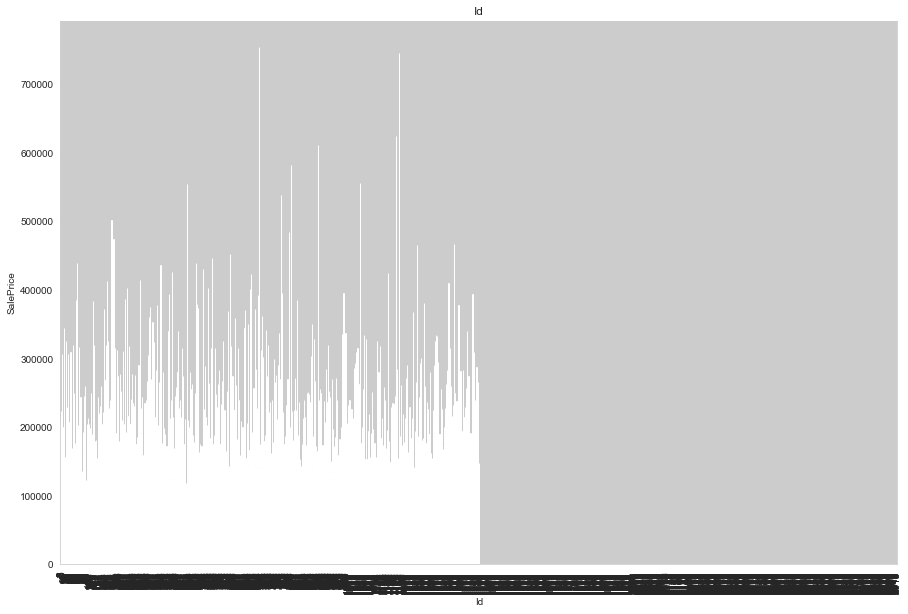

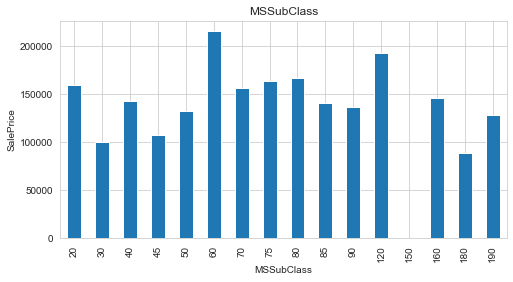

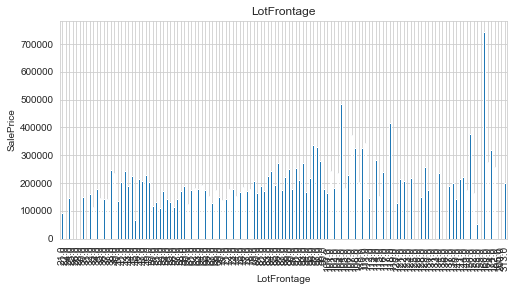

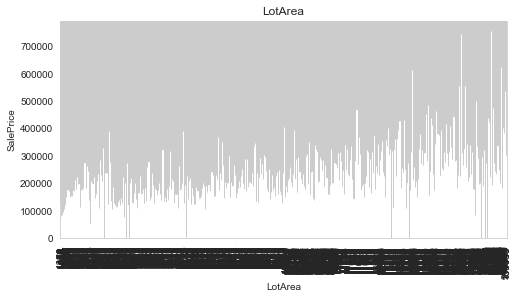

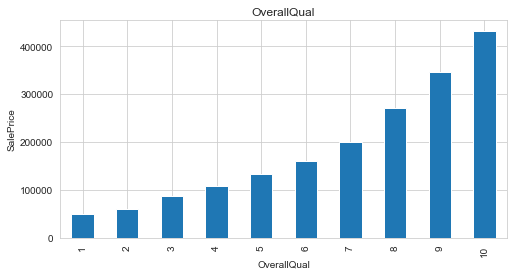

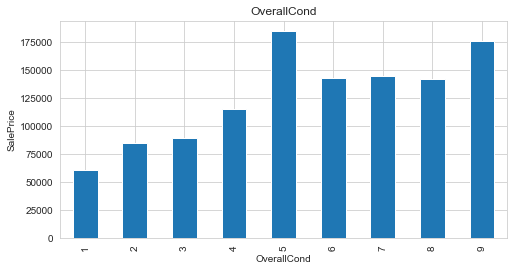

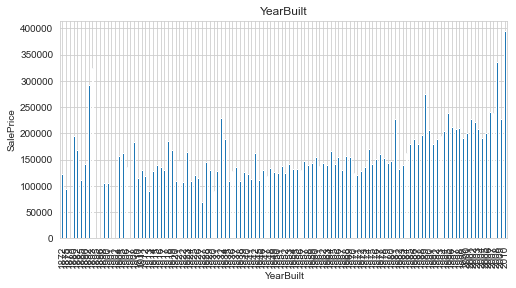

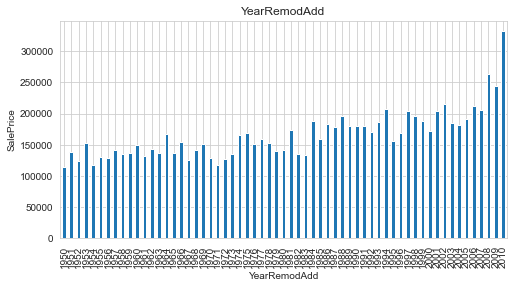

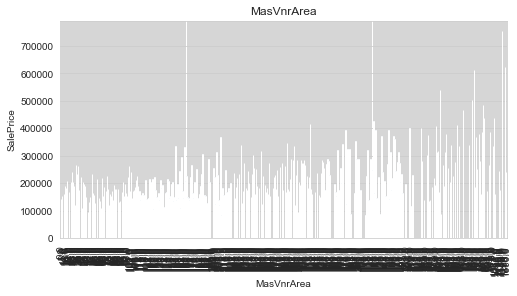

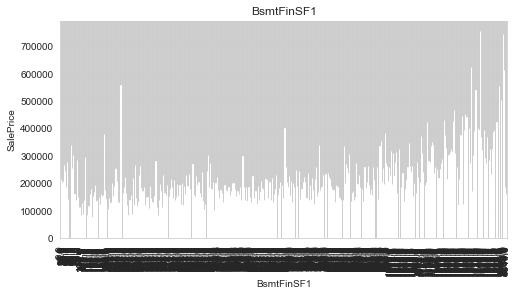

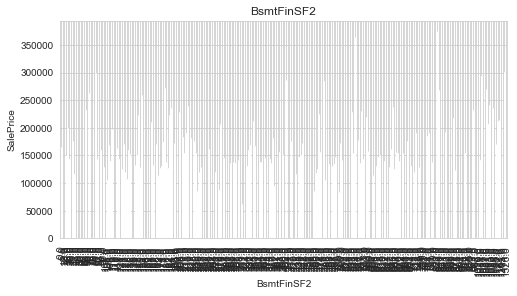

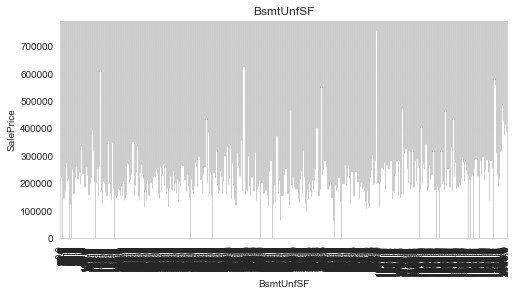

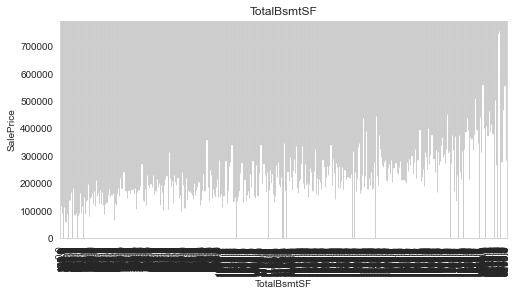

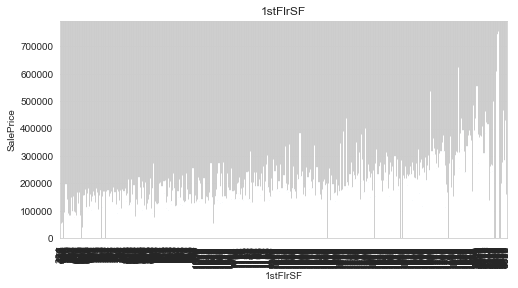

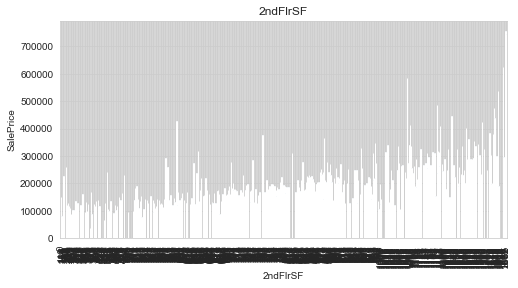

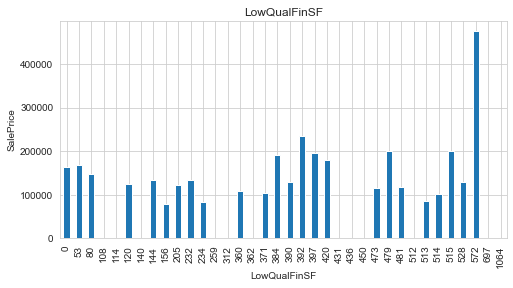

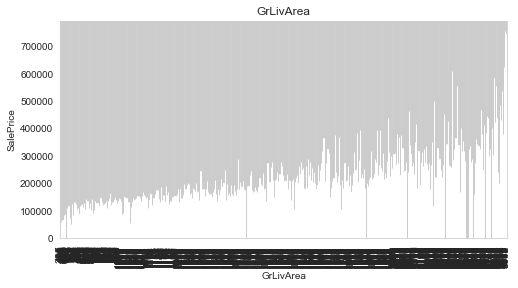

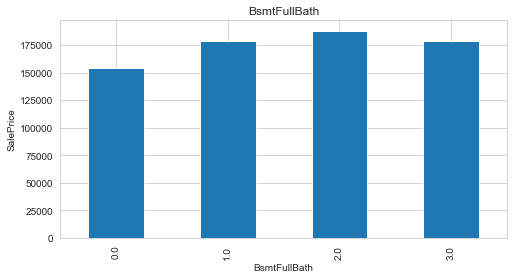

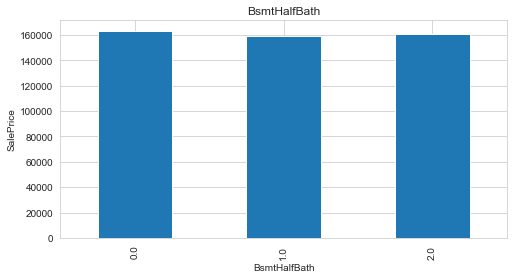

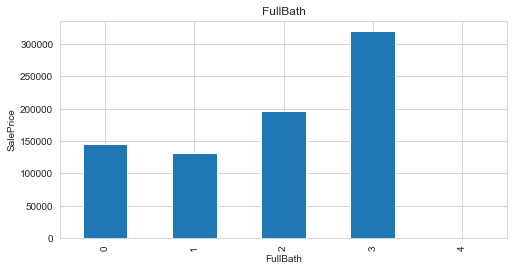

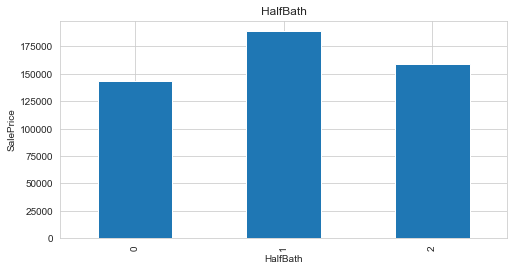

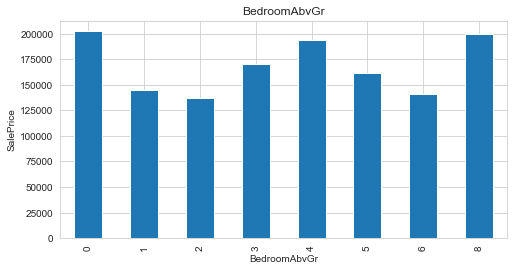

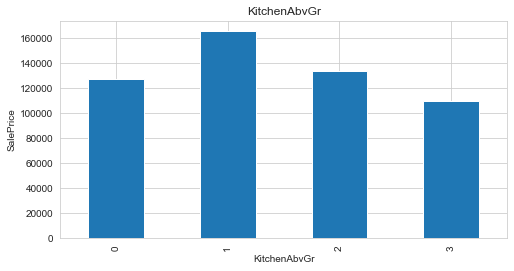

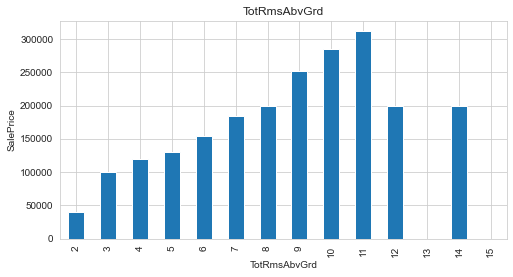

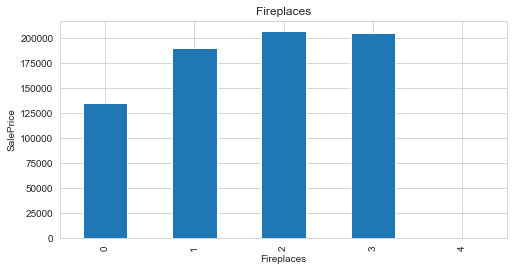

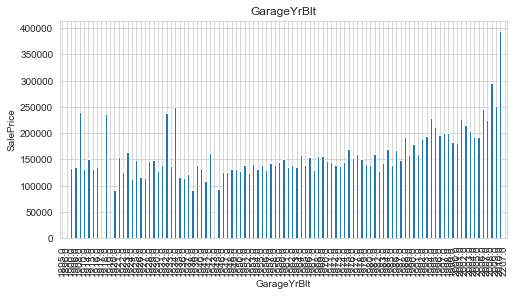

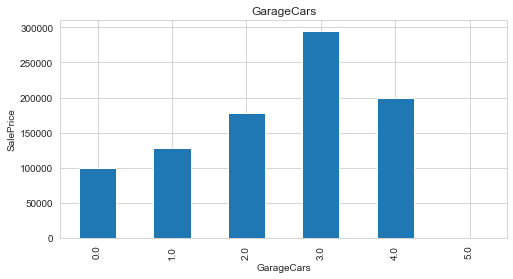

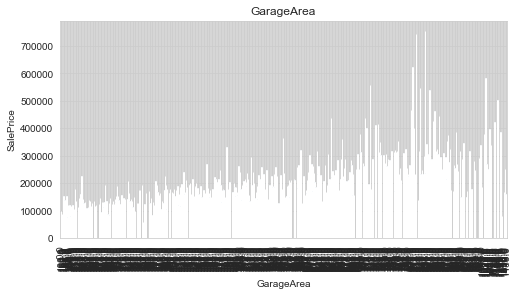

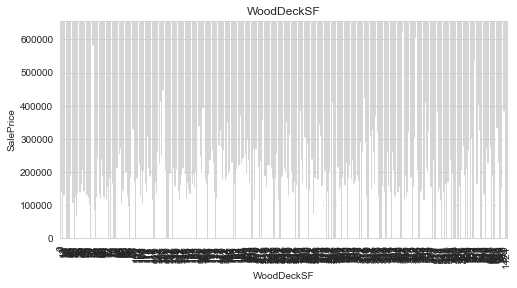

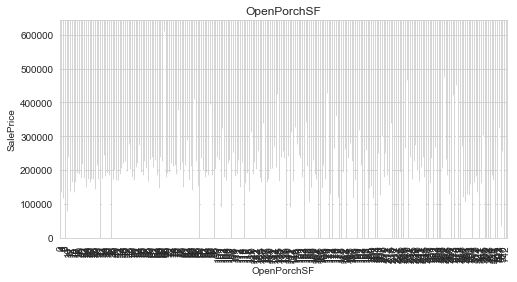

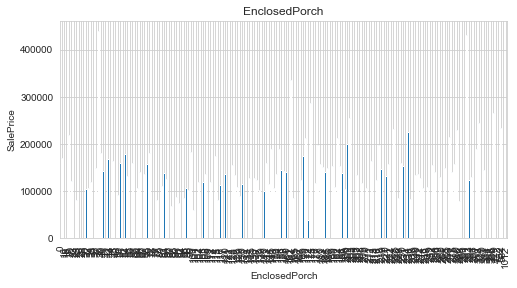

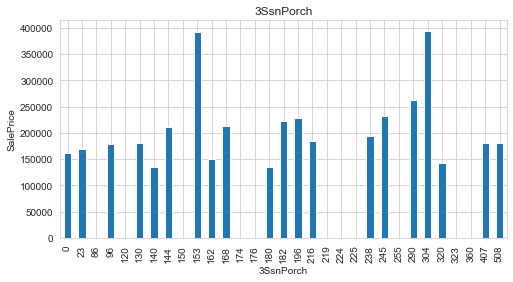

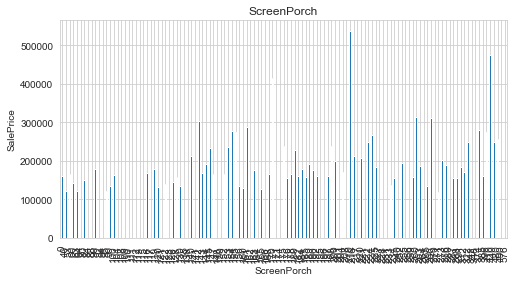

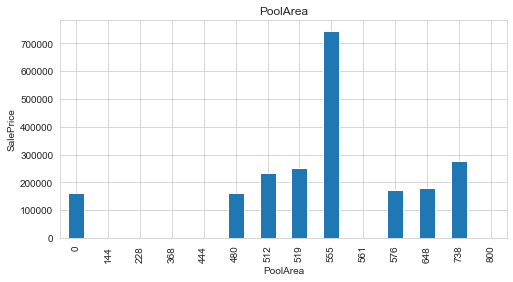

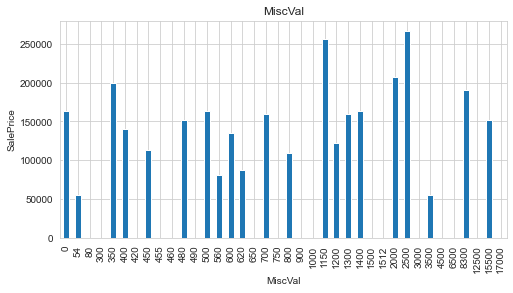

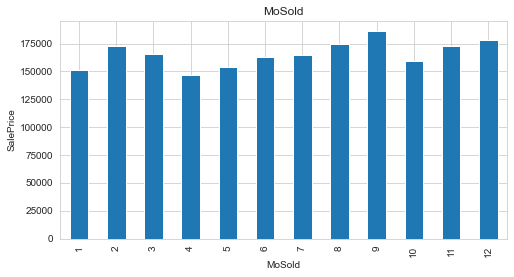

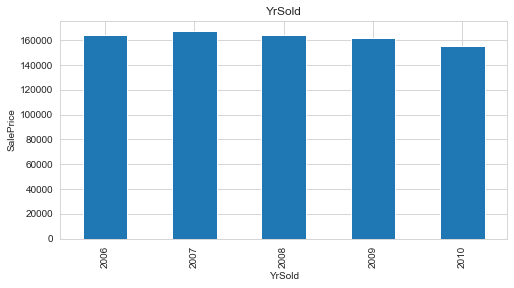

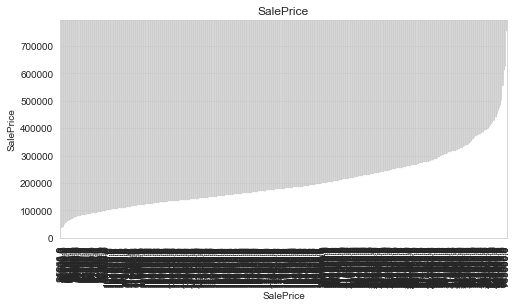

<Figure size 576x288 with 0 Axes>

In [16]:
## Analyse the Numerical values to understand the distribution with hitogram.

for feature in Numerical_Features:
    Hist_Num=cds.copy()
    Hist_Num.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show() 
    plt.figure(figsize=(8,4))
    


In [18]:
#As we can see from above graphs, our data is not normaly distributed fully and it is skewed.

# Categorical/Object Features of cds dataset

In [19]:
categorical_features=[feature for feature in cds.columns if cds[feature].dtypes=='O']
print('No. of categorical featuress: ', len(categorical_features))
categorical_features

No. of categorical featuress:  43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

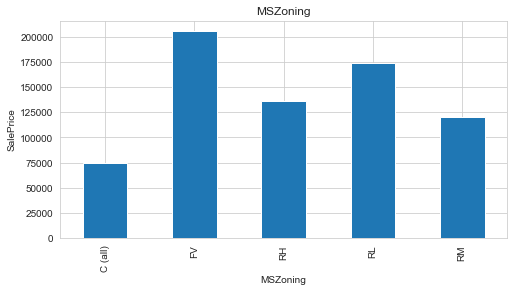

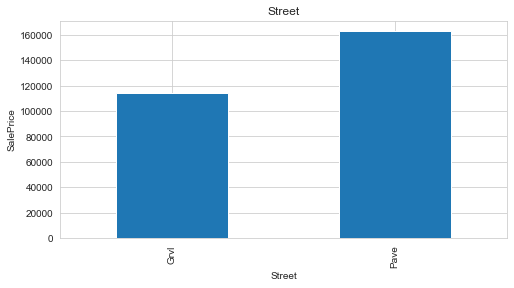

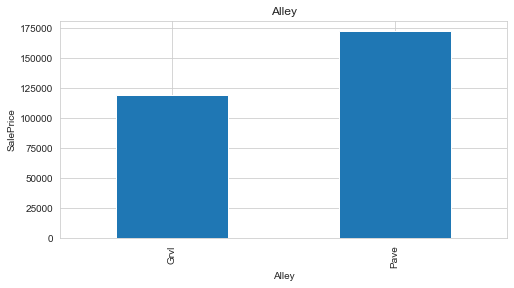

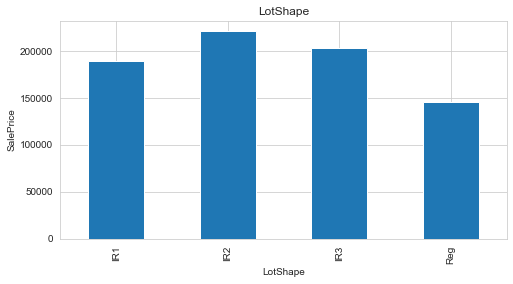

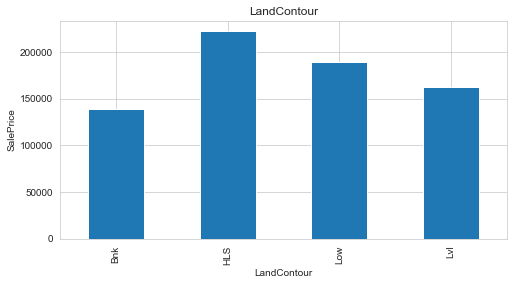

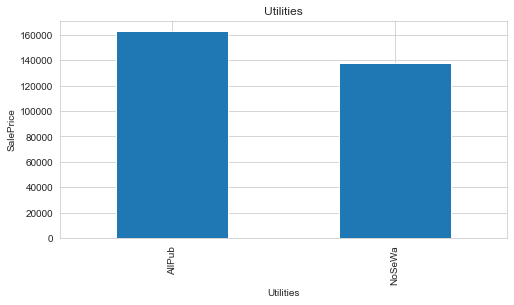

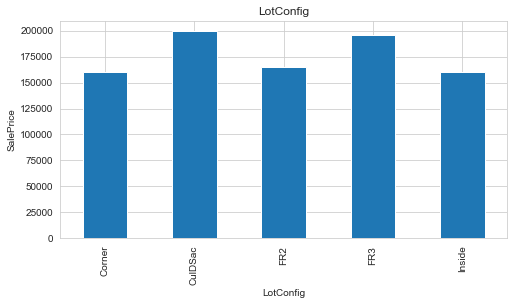

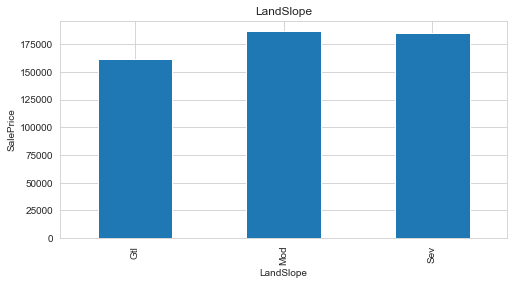

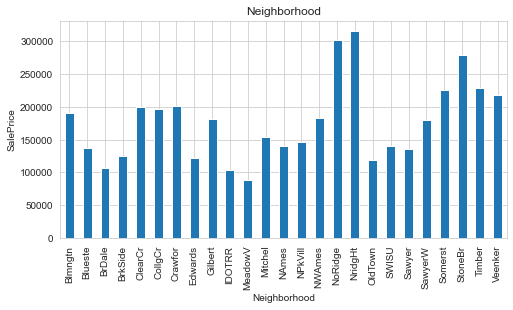

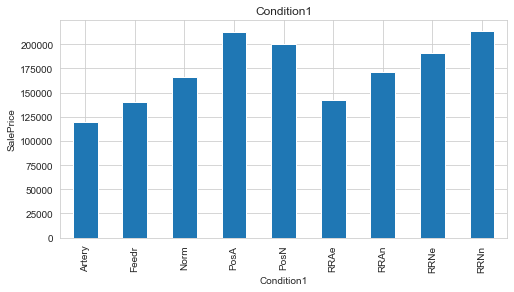

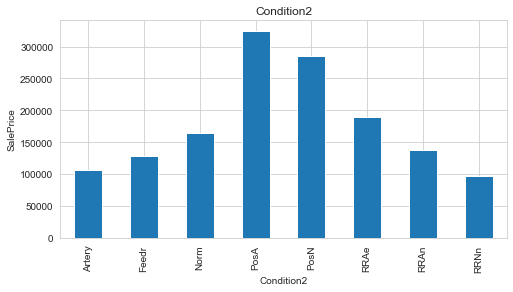

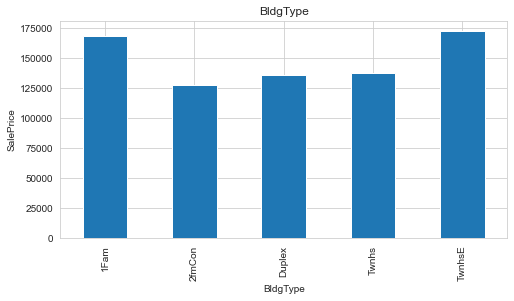

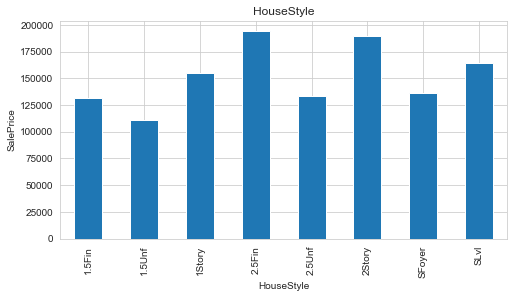

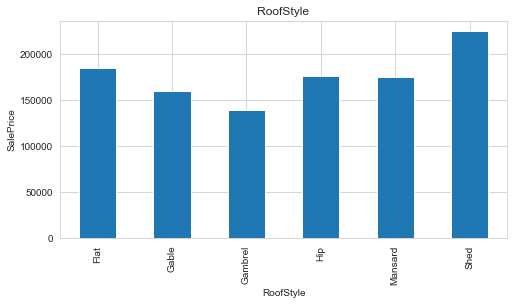

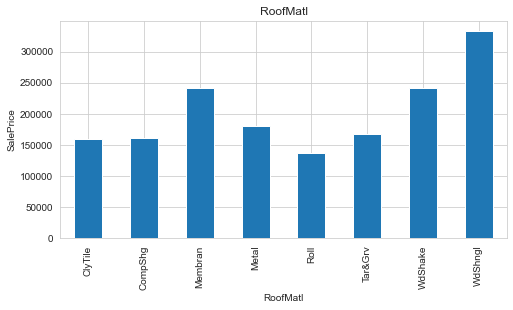

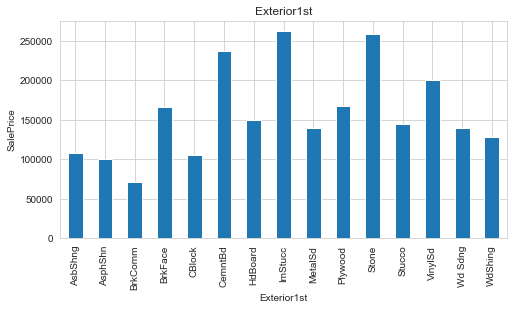

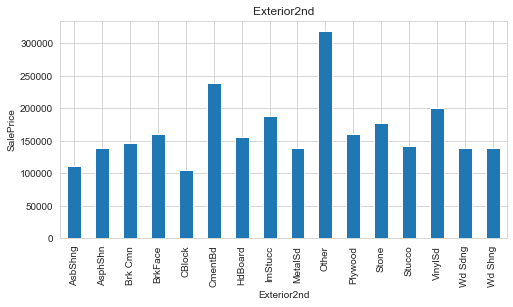

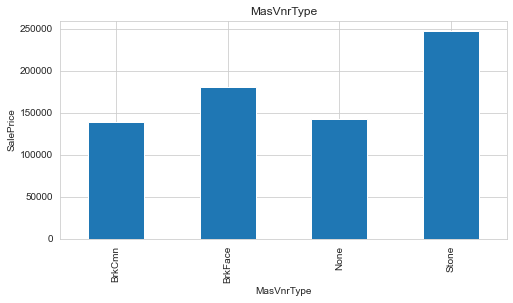

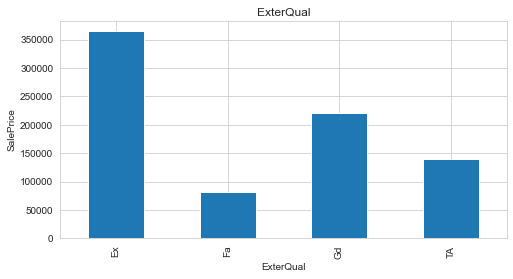

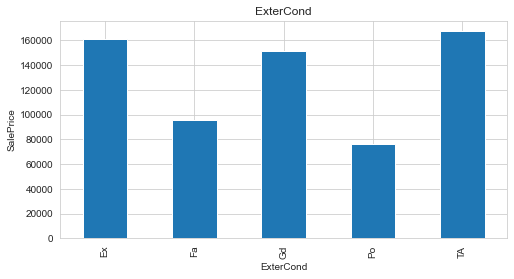

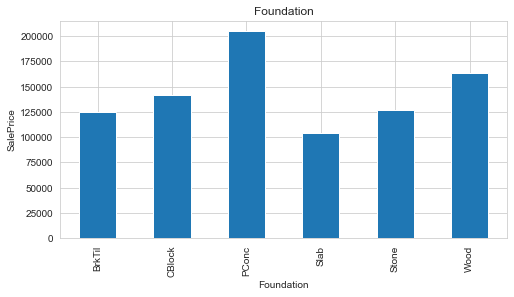

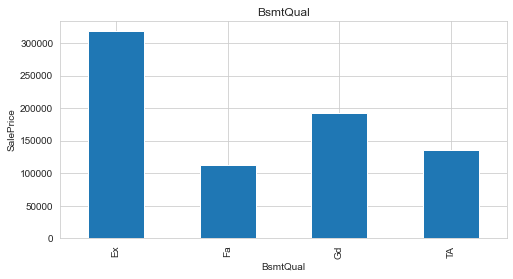

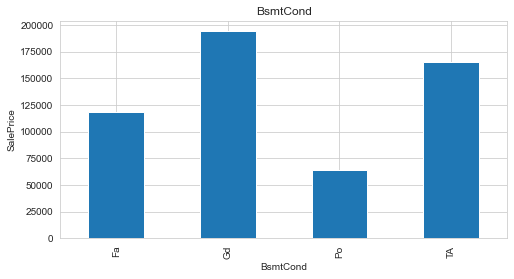

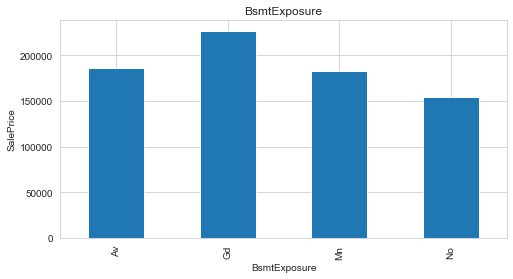

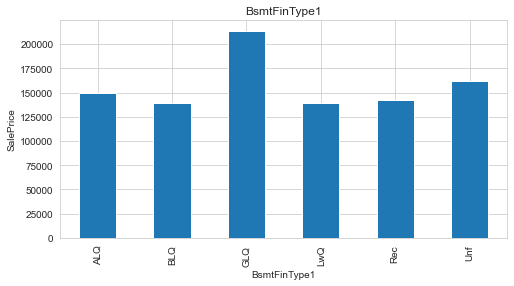

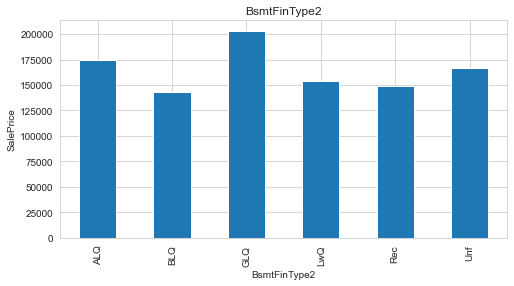

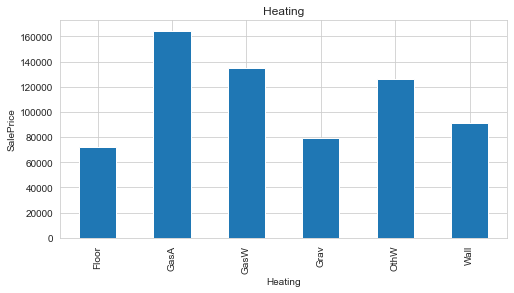

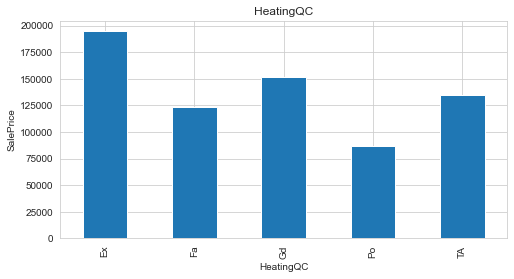

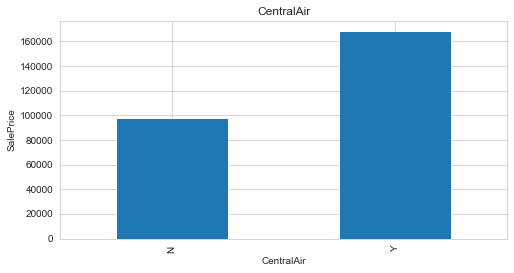

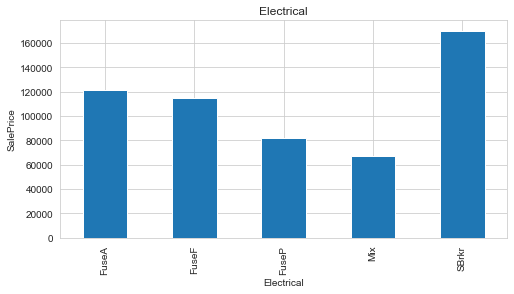

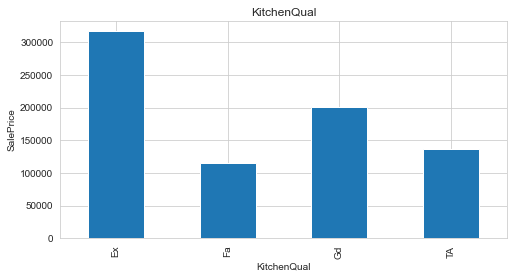

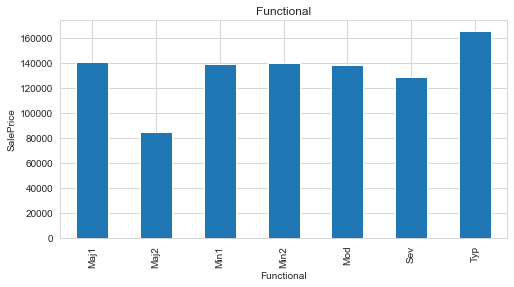

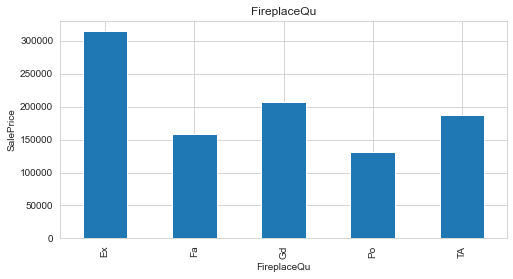

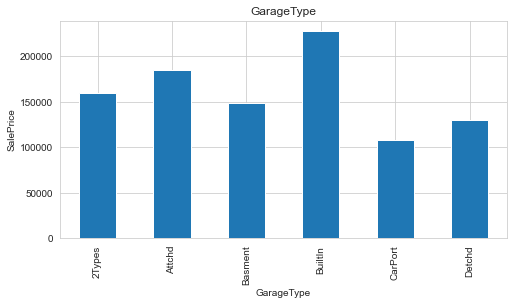

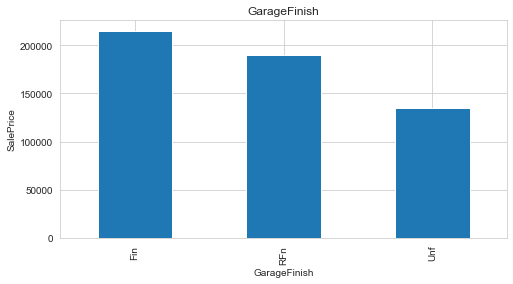

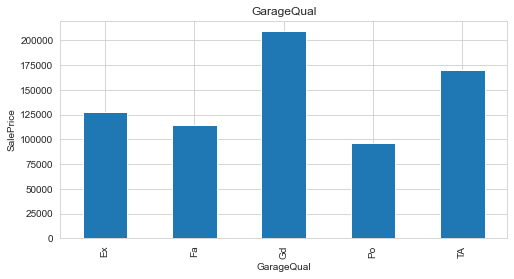

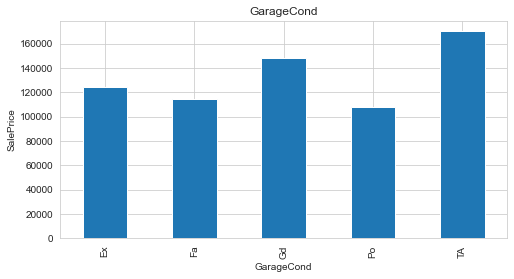

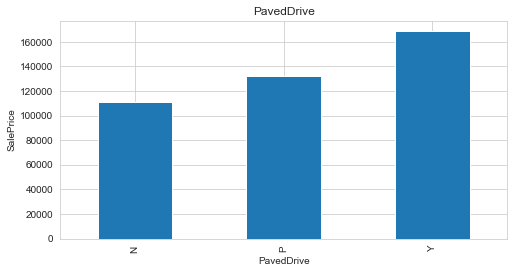

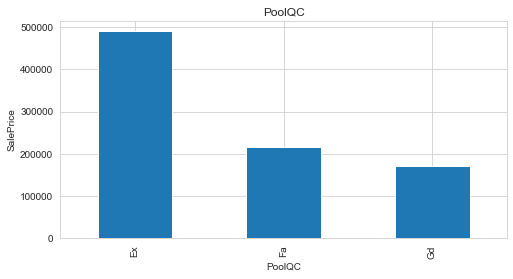

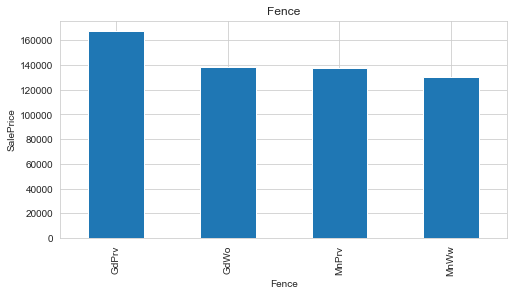

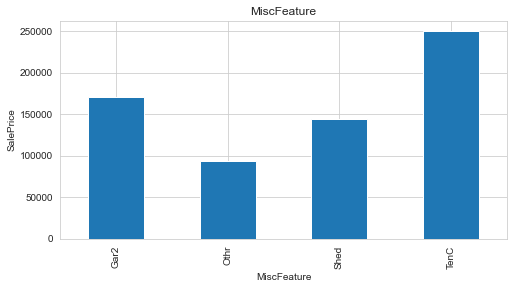

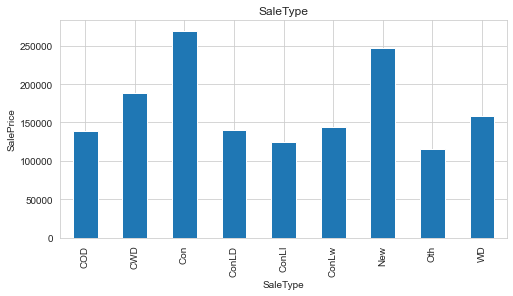

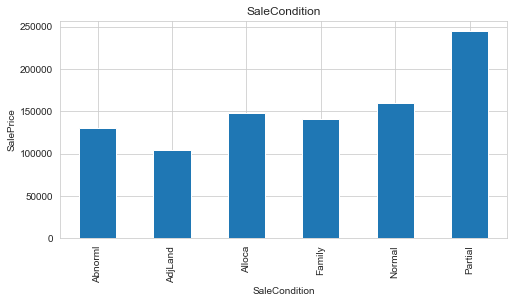

<Figure size 576x288 with 0 Axes>

In [20]:
## Analyse the Numerical values to understand the distribution with hitogram.

plt.figure(figsize=(8,4))
for feature in categorical_features:
    Hist_Cat=cds.copy()
    Hist_Cat.groupby(feature)["SalePrice"].median().plot.bar()
    #Hist_Cat[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show() 
    plt.figure(figsize=(8,4))


### Temporal Features.
** From the Dataset we have 4 year variables(YearBuilt, YearRemodAdd,YrSold, GarageYrBlt).

In [21]:
# Display the variables that contain years information
Features_Years = [feature for feature in Numerical_Features if 'Yr' in feature or 'Year' in feature]

Features_Years

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [22]:
# Explore the content years variables.
for feature in Features_Years:
    print(feature, dataset_train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

# 2. Feature Engineering

# Relationship Between Different Variables

In [23]:
# Correlation Heatmap of Higly Correlated Features with  taget variable"SalePrice"
High_Corr = cds.corr()
High_Corr_Features = High_Corr.index[abs(High_Corr["SalePrice"]) >= 0.5]
High_Corr_Features

C:\Users\Dell\AppData\Local\Temp\ipykernel_6236\3663206697.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  High_Corr = cds.corr()


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

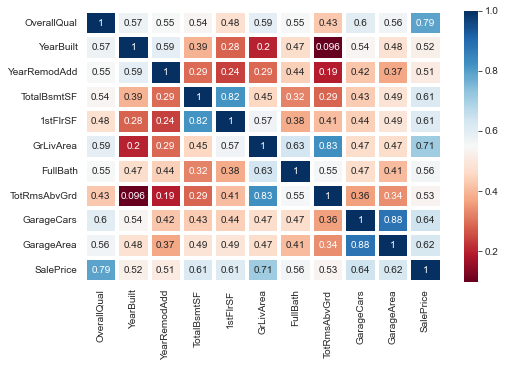

In [24]:
# Correlation-Heatmap-Higly Correlated Features.
plt.figure(figsize=(8,5))
ax = sns.heatmap(dataset_train[High_Corr_Features].corr(), cmap = "RdBu", annot=True, linewidth=4)



C:\Users\Dell\AppData\Local\Temp\ipykernel_6236\232125407.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(dataset_train["SalePrice"])


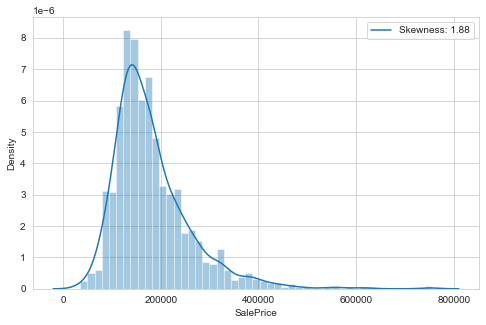

In [25]:
# Distplot of target Variable
plt.figure(figsize=(8,5))
bar = sns.distplot(dataset_train["SalePrice"])
bar.legend(["Skewness: {:.2f}".format(dataset_train["SalePrice"].skew())])

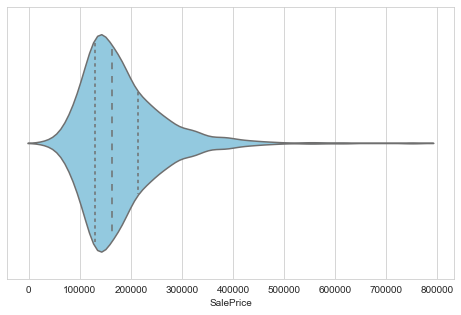

In [26]:
plt.figure(figsize=(8,5))
sns.violinplot(x=dataset_train["SalePrice"], inner="quartile", color="skyblue");

Text(0, 0.5, 'Median House Price')

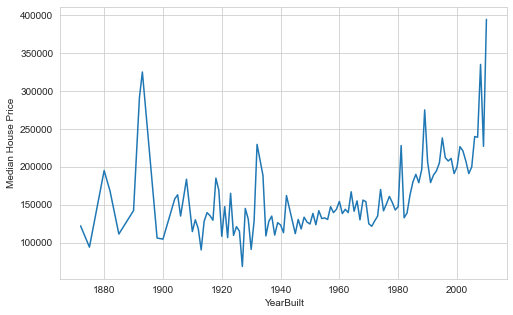

In [27]:
# Relation between yearSold and the sales price
plt.figure(figsize=(8,5))
plt.savefig('YearBuilt-SalesPrice.png', dpi = 300)

dataset_train.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('YearBuilt')
plt.ylabel('Median House Price')


In [28]:
cds.describe()  # to get statistical information of numerical features about dataset.
                #describe() function does not display null values in calulation.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [29]:
cds.describe().shape  # total 38 columns(26 int and 12 float)

(8, 38)

# Drop Features

C:\Users\Dell\AppData\Local\Temp\ipykernel_6236\3196283505.py:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_feat_series = pd.Series.sort_values(dataset_train.corrwith(cds.SalePrice))


<AxesSubplot:>

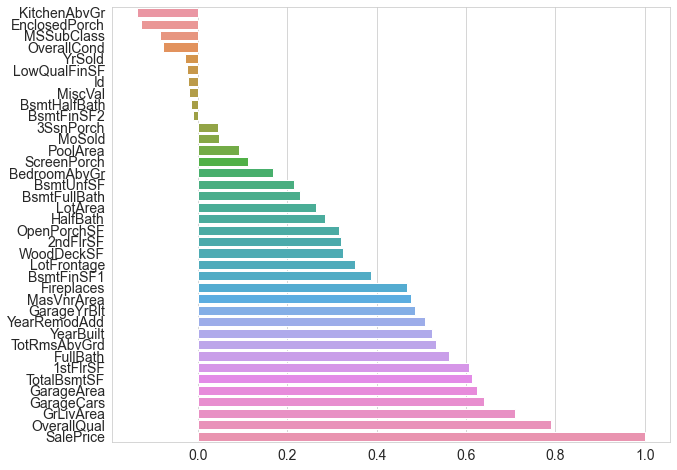

In [248]:
# Correlation Barplot

plt.figure(figsize=(10,8))
corr_feat_series = pd.Series.sort_values(dataset_train.corrwith(cds.SalePrice))
sns.barplot(x=corr_feat_series, y=corr_feat_series.index, orient='h')

In [31]:
#From the above Correlation Barplot, we can see that some faetures are having 
# very less correlation with target variable "SalesPrice".

# So Feature to drop are: "YrSold","LowQualFinSF", "Id","MiscVal","BsmtHalfBath","BsmtFinSF2".

In [247]:
cds_ad=cds.drop(["YrSold","LowQualFinSF", "Id","MiscVal","BsmtHalfBath","BsmtFinSF2"],axis=1)

#cds_ad means concatinated dataset after droping some varibles.

# 2: Feature Engineering:
In this step , I will perform follwing steps which will be used for for analysis or predictive modeling.

2.1 Data Cleaning and Handle Missing Values in Dataset

2.2 Missing Values Imputation/Replace

2.3 Convert Skewed Data to Log Normal Distribution

2.4 Feature Transformation



# 2.1 Data Cleaning and Handle Missing Values in Dataset

In [33]:
cds_ad.corr() # Pearson corealtion between variables

C:\Users\Dell\AppData\Local\Temp\ipykernel_6236\90726089.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cds_ad.corr() # Pearson corealtion between variables


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice
MSSubClass,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.125994,-0.219965,-0.248641,0.309309,0.071677,0.009950,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.087898,-0.046597,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.001231,-0.084284
LotFrontage,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.113714,0.354822,0.458247,0.026545,0.382462,0.113245,0.181668,0.039452,0.234892,0.004676,0.349513,0.261970,0.076673,0.310587,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.011254,0.351799
LotArea,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.021362,0.254138,0.332460,0.031515,0.284519,0.128349,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008628,0.180434,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.004156,0.263843
OverallQual,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,0.275175,0.549294,0.479152,0.245596,0.575126,0.164543,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.571803,0.600744,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.030405,0.790982
OverallCond,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,-0.138202,-0.174002,-0.157418,0.005494,-0.116569,-0.042133,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.325849,-0.181787,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,-0.006256,-0.077856
YearBuilt,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,0.130473,0.408515,0.310814,0.017588,0.242666,0.211580,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.834812,0.538074,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,0.013938,0.522897
YearRemodAdd,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,0.165175,0.298107,0.242245,0.158985,0.316972,0.134947,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.652365,0.426022,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,0.017693,0.507101
MasVnrArea,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,0.090163,0.397240,0.395834,0.121014,0.402994,0.141593,0.259777,0.191950,0.078126,-0.051389,0.278228,0.275195,0.255112,0.361190,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,-0.000117,0.477493
BsmtFinSF1,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.477404,0.536467,0.458092,-0.162301,0.211669,0.638847,0.081525,-0.007311,-0.113547,-0.086354,0.052141,0.293089,0.194270,0.255482,0.310449,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,-0.000942,0.386420
BsmtUnfSF,-0.125994,0.113714,0.021362,0.275175,-0.138202,0.130473,0.165175,0.090163,-0.477404,1.000000,0.412285,0.296600,-0.000376,0.233988,-0.398678,0.273207,-0.035803,0.183259,0.064987,0.247505,0.004814,0.171588,0.180099,0.164409,-0.039302,0.119764,0.005006,-0.005810,-0.049158,-0.032273,0.022607,0.214479


<AxesSubplot:>

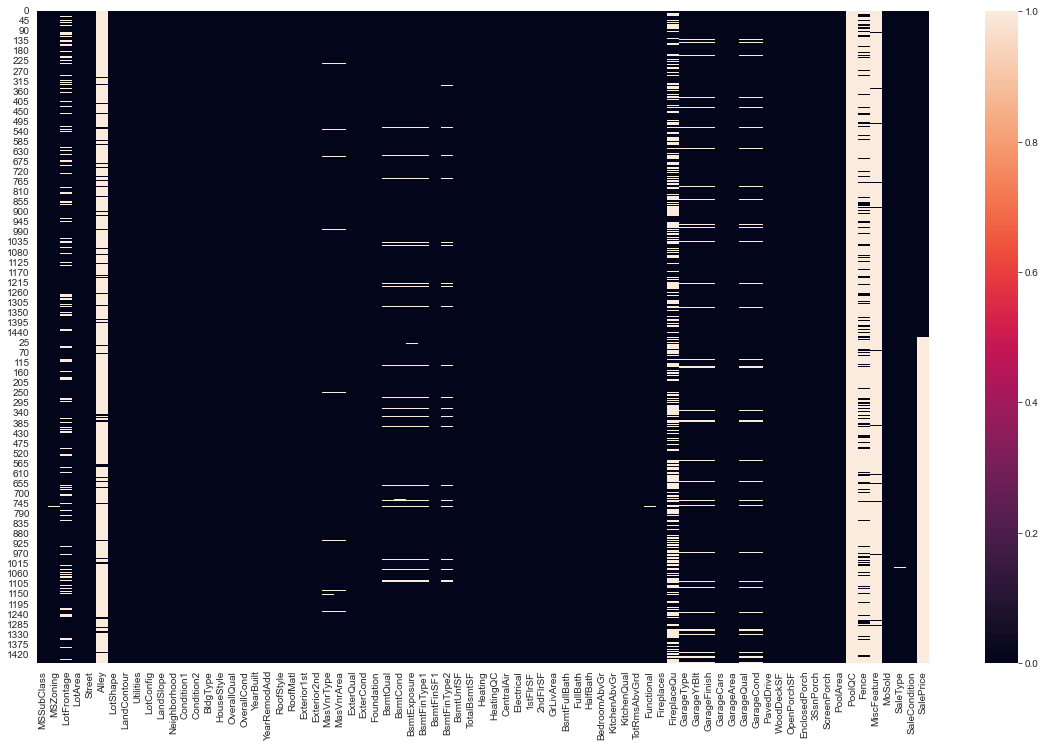

In [34]:
plt.figure(figsize=(20,12))
sns.heatmap(cds_ad.isnull()) 
# It contains valuees in 0 and 1 format;Black cplour represent 0(not null) and full white colour represent 1,
#means where null values are present.As we can see in above heatmap, most null value features are:
#Alley, FireplaceQu,PoolIQC, Fence,MiscFeature


In [35]:
pd.set_option("display.max_columns", None) # This function used to display all rows and columns
pd.set_option("display.max_rows", None)

nullvalues_count=cds_ad.isnull().sum() # Count null values presesnt in each faetures
nullvalues_count


MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        2
FullBath  

In [36]:
percentage_nullvalues = cds_ad.isnull().sum()/cds.shape[0]*100 
percentage_nullvalues    # Display % of null values presesnt in each faetures.

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
H

In [37]:
miss_values_20_percent=percentage_nullvalues[percentage_nullvalues>20]
print("Missing values>20%:\n",miss_values_20_percent)

Missing values>20%:
 Alley          93.216855
FireplaceQu    48.646797
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
SalePrice      49.982871
dtype: float64


In [38]:
cds["Alley"].value_counts() # Here,other than Grvl and Pave, there is None values present(After checking Description file)

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [39]:
# As per domain given description and knowledge, I will not drop Alley features, 
# instead None values, I will add  a constant value"NA"

In [40]:
miss_values_5_50_percent=percentage_nullvalues[(percentage_nullvalues>5) & (percentage_nullvalues<51)] 
miss_values_5_50_percent
print("Missing values 5 to 50%:\n",miss_values_5_50_percent)

Missing values 5 to 50%:
 LotFrontage     16.649538
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
SalePrice       49.982871
dtype: float64


In [41]:
#Here, If I check FireplaceQu in data description, NA means no fireplace.
#As per domain given description and knowledge, I will not drop FireplaceQu, 
# instead None values, I will add  a constant value"NA"

<AxesSubplot:>

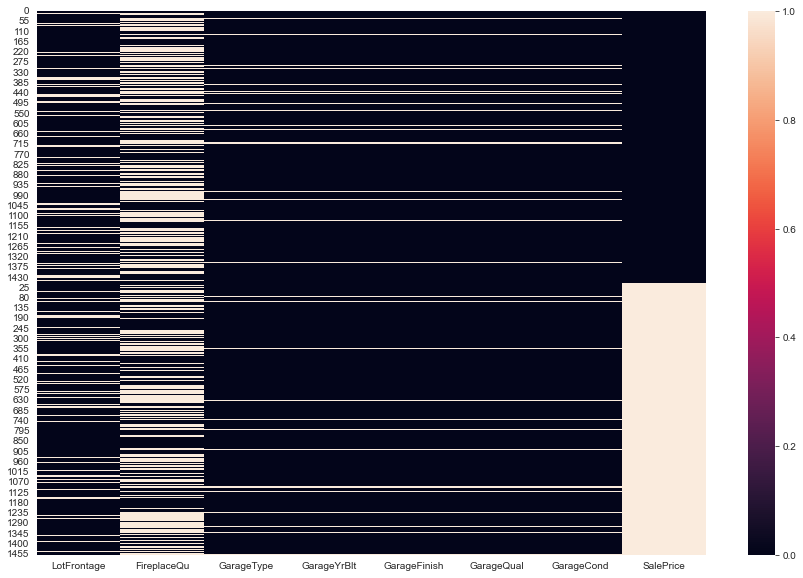

In [42]:
sns.heatmap(cds_ad[miss_values_5_50_percent.keys()].isnull()) # isnull means , no missing values, there is NA value.

In [43]:
# If there is no garage, there will not be GarageYrBlt,GrgQuality, GarageCondition. So as per domain knowledge,
#we can not drop these features.

# 2.2 Missing Values Imputation/Replace.

In [44]:
missingvalues_features=percentage_nullvalues[percentage_nullvalues>0]
print("Total of missingValues features:",len(missingvalues_features))

Total of missingValues features: 33


In [45]:
missingvalues_features

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [46]:
Numerical_Na_Feature = missingvalues_features[missingvalues_features.keys().isin(Numerical_Features)]
print("Total of Numerical NA Features:",len(Numerical_Na_Feature))
Numerical_Na_Feature

Total of Numerical NA Features: 10


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [47]:
Cat_Na_Feature = missingvalues_features[missingvalues_features.keys().isin(categorical_features)]
print("Total of Categorical NA Features:",len(Cat_Na_Feature))
Cat_Na_Feature

Total of Categorical NA Features: 23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

# Handling MSZoning=0.137033

In [48]:
###Backup of Orizinal data###
cds_mvi=cds_ad.copy()
cds_mvi.shape

#Here in output we have only 75 features instead of 81, Because we drop 6 feature earlier.

(2919, 75)

In [49]:
cds_mvi["MSZoning"].value_counts() # Display MSZoning categories.

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

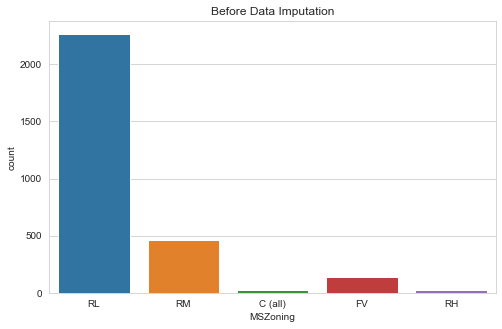

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='MSZoning',data=cds_mvi).set(title='Before Data Imputation')  
plt.show()

In [51]:
msz_mode=cds_mvi["MSZoning"].mode()[0]
msz_mode

'RL'

In [52]:
msz_mode=cds_mvi["MSZoning"].mode()[0]
cds_mvi["MSZoning"].replace(np.nan,msz_mode,inplace=True)
cds_mvi["MSZoning"].isnull().sum()

0

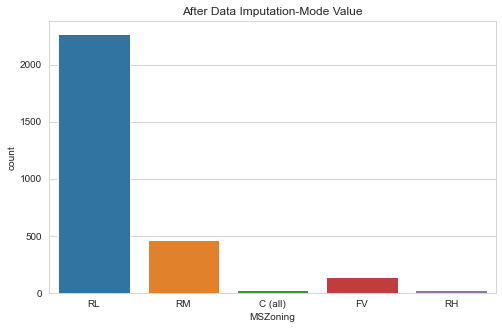

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x ='MSZoning', data = cds_mvi).set(title='After Data Imputation-Mode Value')
plt.show()

In [54]:
#nullvalues_count=cds_mvi.isnull().sum() # Count null values presesnt in each faetures
#nullvalues_count

#  Handling LotFrontage= 486

[Text(0.5, 1.0, 'Before Data Imputation')]

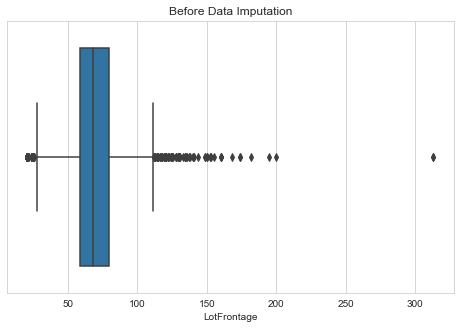

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x='LotFrontage',data=cds_mvi).set(title='Before Data Imputation') 


In [56]:
### From Above graphs, we can see that our data is right skiewed, not in proper bell shape.
## If we have left/right skiewd data, we have to take median value(as it is less senstive to outliers), 
#not mean for data imputation.

In [57]:
LotFrontage_Median=cds["LotFrontage"].median()
LotFrontage_Median

68.0

In [58]:
LotFrontage_Median=cds["LotFrontage"].median()
cds_mvi["LotFrontage"].replace(np.nan,LotFrontage_Median,inplace=True)
cds_mvi["LotFrontage"].isnull().sum()

0

[Text(0.5, 1.0, 'After Data Imputation with Median Value')]

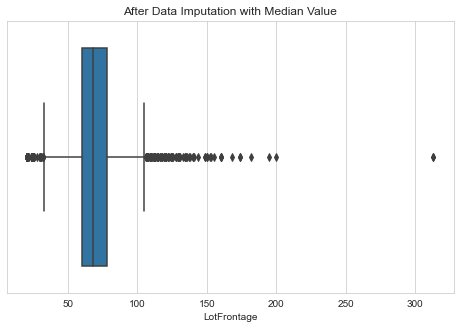

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(x='LotFrontage',data=cds_mvi).set(title='After Data Imputation with Median Value') 


In [60]:
#As we can see after imputation, our data is not so much disturbed, only left side outliers increased.

# Handling Alley=93.216855

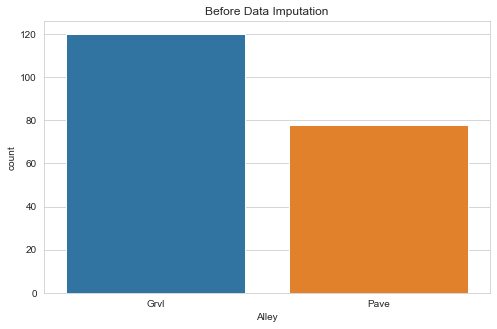

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(x='Alley',data=cds_mvi).set(title='Before Data Imputation')  
plt.show()

In [62]:
cds_mvi["Alley"].value_counts() # Display Alley categories.

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [63]:
Alley_Count="NA"   ## I added "NA" constant
cds_mvi["Alley"].replace(np.nan,Alley_Count,inplace=True)
cds_mvi["Alley"].isnull().sum()

0

[Text(0.5, 1.0, 'After Data Imputation with NA constant')]

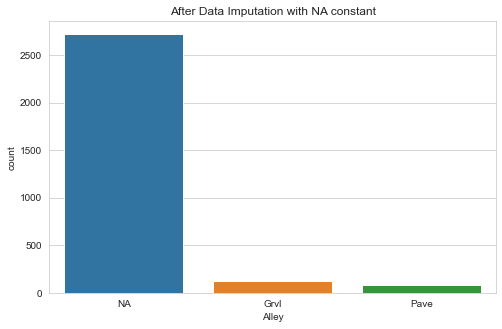

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x='Alley',data=cds_mvi).set(title="After Data Imputation with NA constant") 

# Handling Utilities=0.06851

In [65]:
cds_mvi["Utilities"].value_counts()


AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

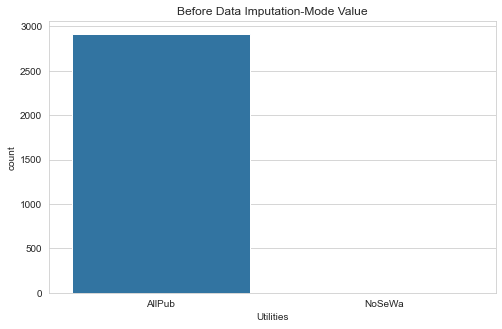

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Utilities', data = cds_mvi).set(title='Before Data Imputation-Mode Value')
plt.show()

In [67]:
utilities_Mode=cds["Utilities"].mode()[0]
cds_mvi["Utilities"].replace(np.nan,utilities_Mode,inplace=True)
cds_mvi["Utilities"].isnull().sum()

0

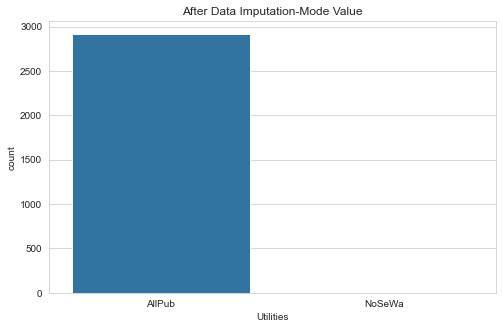

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Utilities', data = cds_mvi).set(title='After Data Imputation-Mode Value')
plt.show()

# Exterior1st=0.034 and Exterior2nd=0.34258

In [69]:
cds_mvi["Exterior1st"].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

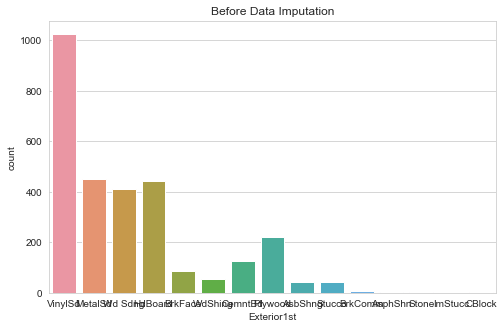

In [70]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Exterior1st', data = cds_mvi).set(title='Before Data Imputation')
plt.show()

In [71]:
cds_mvi["Exterior2nd"].value_counts()# Both of thaem almost similar values, I will impute mode vaue here.

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [72]:
exterior1st_Mode=cds_mvi["Exterior1st"].mode()[0]
exterior3nd_Mode=cds_mvi["Exterior2nd"].mode()[0]

cds_mvi["Exterior1st"].replace(np.nan,exterior1st_Mode,inplace=True)
cds_mvi["Exterior2nd"].replace(np.nan,exterior3nd_Mode,inplace=True)
print("Ext1s is null:",cds_mvi["Exterior1st"].isnull().sum())
print("Ext2nd is null:",cds_mvi["Exterior2nd"].isnull().sum())


Ext1s is null: 0
Ext2nd is null: 0


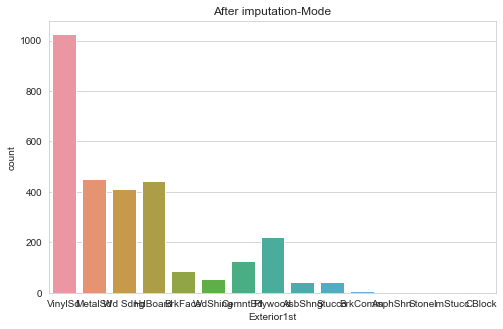

In [73]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Exterior1st', data = cds_mvi).set(title='After imputation-Mode')
plt.show()

# Handling MasVnrType=0.822199(Categorical) and MasVnrArea=0.787941(Numerical)

In [74]:
cds_mvi["MasVnrType"].value_counts()
# After run, we can see there is already None category available, So I ll compute Mode value.

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

[Text(0.5, 1.0, 'Before Data imputation')]

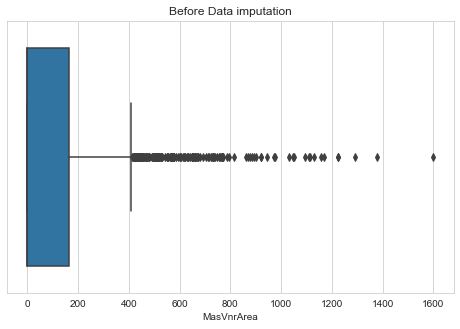

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(x='MasVnrArea',data=cds_mvi).set(title='Before Data imputation')


In [76]:

masvantype_Mode=cds_mvi["MasVnrType"].mode()[0]
cds_mvi["MasVnrType"].replace(np.nan,masvantype_Mode,inplace=True)
print("masvantype_Mode is null:",cds_mvi["Exterior1st"].isnull().sum())


masvantype_Mode is null: 0


[Text(0.5, 1.0, 'After imputation-Mode')]

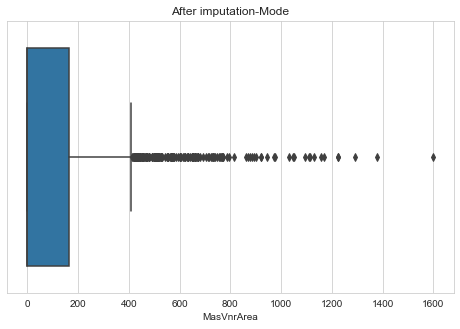

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(x='MasVnrArea',data=cds_mvi).set(title='After imputation-Mode')

# Here in boxplot, we can see, there is so many outliers.So its better to impute zero value rather than mode and median.

In [78]:
masvnrarea_constant=0
cds_mvi["MasVnrArea"].replace(np.nan,masvnrarea_constant,inplace=True)
print("masvantype_Mode is null:",cds_mvi["MasVnrArea"].isnull().sum())

masvantype_Mode is null: 0


# Handling Basement Features:-

In [79]:

#Numerical_bsmt_feature
#BsmtFinSF1       0.034258
#BsmtUnfSF        0.034258
#BsmtFullBath     0.068517
#TotalBsmtSF      0.034258

#Catagorical_bsmt_feature
#BsmtQual         2.774923
#BsmtExposure     2.809181
#BsmtFinType1     2.706406
#BsmtFinType2     2.740665
#BsmtCond         2.809181

#####################Just for Refrences###############

In [80]:
plt.figure(figsize=(8,5))
Numerical_bsmt_feature=["BsmtFinSF1","BsmtUnfSF","BsmtFullBath","TotalBsmtSF"]

Catagorical_bsmt_feature=["BsmtQual","BsmtExposure","BsmtFinType1","BsmtFinType2","BsmtCond"]


<Figure size 576x360 with 0 Axes>

[Text(0.5, 1.0, 'Numerical_bsmt_feature')]

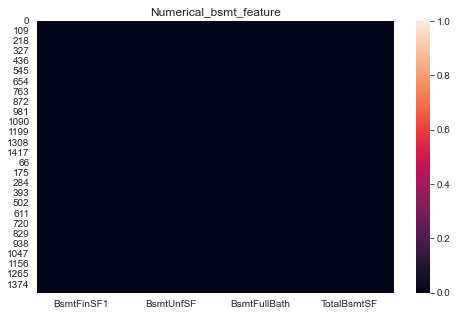

In [81]:
plt.figure(figsize=(8,5))
sns.heatmap(cds_mvi[Numerical_bsmt_feature].isnull()).set(title='Numerical_bsmt_feature')

[Text(0.5, 1.0, 'Catagorical_bsmt_feature')]

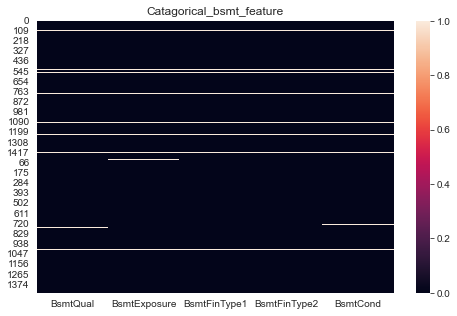

In [82]:
plt.figure(figsize=(8,5))
sns.heatmap(cds_mvi[Catagorical_bsmt_feature].isnull()).set(title='Catagorical_bsmt_feature')

In [83]:
for feature in Catagorical_bsmt_feature:
    print(f"value count of {feature}:{cds[feature].value_counts()}")

value count of BsmtQual:TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
value count of BsmtExposure:No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
value count of BsmtFinType1:Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
value count of BsmtFinType2:Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
value count of BsmtCond:TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64


In [84]:
bsmt_constant="NA"
for feature in Catagorical_bsmt_feature:
    cds_mvi[feature].replace(np.nan,bsmt_constant,inplace=True)

In [85]:
cds_mvi[Catagorical_bsmt_feature].isnull().sum()

BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
BsmtCond        0
dtype: int64

<AxesSubplot:>

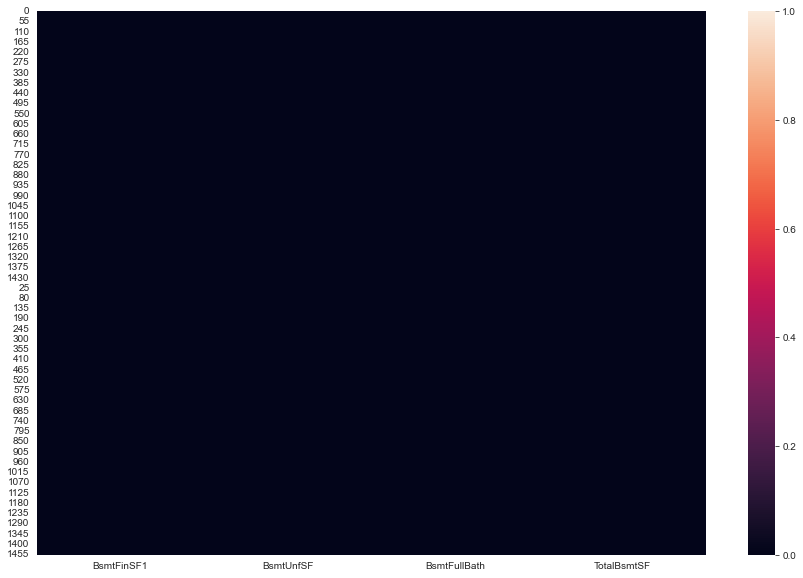

In [86]:

sns.heatmap(cds_mvi[Numerical_bsmt_feature].isnull()) # Heatmap of Numerical Features.
#Here we are not able to see any missing value because % age of missing values is very less.


In [87]:
bsmt_num_constant=0
for feature in Numerical_bsmt_feature:
    cds_mvi[feature].replace(np.nan,bsmt_num_constant,inplace=True)
    

In [88]:
cds_mvi[Numerical_bsmt_feature].isnull().sum()# To Check , is there any missing value available-Crosscheck

BsmtFinSF1      0
BsmtUnfSF       0
BsmtFullBath    0
TotalBsmtSF     0
dtype: int64

# Handling Electrical =0.034258 and KitchenQual=0.034258

In [89]:
cds_mvi["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [90]:
cds_mvi["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [91]:
elt_Mode=cds["Electrical"].mode()[0]
cds_mvi["Electrical"].replace(np.nan,elt_Mode,inplace=True)
print("Elt is null:",cds_mvi["Electrical"].isnull().sum())

KitchenQ_Mode=cds["KitchenQual"].mode()[0]
cds_mvi["KitchenQual"].replace(np.nan,KitchenQ_Mode,inplace=True)
print("KitchenQ is null:",cds_mvi["KitchenQual"].isnull().sum())

Elt is null: 0
KitchenQ is null: 0


# Handling Remaining Categorical Features:

In [92]:
#Functional       0.068517-Mode
#FireplaceQu     48.646797-NA
#PoolQC          99.657417-NA
#Fence           80.438506-NA
#MiscFeature     96.402878-NA
#SaleType        0.034258-Mode


## I will impute mode values in Functional and saleType Cat-Feature and in remaining, will put NA values.

In [93]:
cds_mvi["Functional"].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [94]:
cds_mvi["SaleType"].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [95]:
function_Mode=cds_mvi["Functional"].mode()[0]
cds_mvi["Functional"].replace(np.nan,function_Mode,inplace=True)
print("Function is null:",cds_mvi["Functional"].isnull().sum())

saletype_Mode=cds["SaleType"].mode()[0]
cds_mvi["SaleType"].replace(np.nan,saletype_Mode,inplace=True)
print("SaleType is null:",cds_mvi["SaleType"].isnull().sum())

Function is null: 0
SaleType is null: 0


In [96]:
Others_cat_Feat=["FireplaceQu",
"PoolQC",
"Fence",
"MiscFeature"]

In [97]:
for fa in Others_cat_Feat:
    print(f"value count of {fa}:{cds_mvi[feature].value_counts()}") ## I will impute NA""

value count of FireplaceQu:0.0       79
864.0     74
672.0     29
912.0     26
1040.0    25
768.0     24
816.0     23
728.0     20
780.0     19
1008.0    19
384.0     19
960.0     18
756.0     17
894.0     17
832.0     17
600.0     16
546.0     16
936.0     16
848.0     16
720.0     16
483.0     14
630.0     13
840.0     13
952.0     13
988.0     12
624.0     12
784.0     11
796.0     11
876.0     11
1056.0    10
884.0     10
928.0      9
858.0      9
738.0      9
855.0      9
1728.0     8
896.0      8
925.0      8
990.0      8
1073.0     8
992.0      8
970.0      8
972.0      7
698.0      7
847.0      7
1200.0     7
684.0      7
845.0      7
1168.0     7
686.0      7
1208.0     7
572.0      7
793.0      7
1216.0     7
1092.0     7
1080.0     7
882.0      7
1100.0     7
1362.0     7
926.0      7
910.0      7
660.0      7
1054.0     7
1152.0     6
1064.0     6
1392.0     6
984.0      6
1078.0     6
725.0      6
836.0      6
680.0      6
689.0      6
1248.0     6
1302.0     6
861.0      

In [98]:
FireQ="NA"   ## I added "NA" constant
cds_mvi["FireplaceQu"].replace(np.nan,FireQ,inplace=True)
cds_mvi["FireplaceQu"].isnull().sum()

0

In [99]:
PoolQ="NA"   ## I added "NA" constant
cds_mvi["PoolQC"].replace(np.nan,PoolQ,inplace=True)
cds_mvi["PoolQC"].isnull().sum()

0

In [100]:
fence="NA"   ## I added "NA" constant
cds_mvi["Fence"].replace(np.nan,fence,inplace=True)
cds_mvi["Fence"].isnull().sum()

0

In [101]:
miscF="NA"   ## I added "NA" constant
cds_mvi["MiscFeature"].replace(np.nan,miscF,inplace=True)
cds_mvi["MiscFeature"].isnull().sum()

0

# Handling Garage Features:

In [102]:
########Numerical_garage_feature  ###############
#GarageYrBlt      5.447071--0
#GarageCars       0.034258--0
#GarageArea       0.034258--0

#Catagorical_garage_feature
#GarageType       5.378554 NA
#GarageFinish     5.447071 NA
#GarageQual       5.447071 NA
#GarageCond       5.447071 NA

############ Just for Refrence######


In [103]:
Numerical_garage_feature=["GarageYrBlt","GarageCars","GarageArea"]
Catagorical_garage_feature=["GarageType","GarageFinish","GarageQual","GarageCond"]

In [104]:
garage_num_constant=0
for feature in Numerical_garage_feature:
    cds_mvi[feature].replace(np.nan,garage_num_constant,inplace=True)

In [105]:
cds_mvi[Numerical_garage_feature].isnull().sum()# To Check , is there any missing value available-Crosscheck

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [106]:
garage_constant="NA"
for feature in Catagorical_garage_feature:
    cds_mvi[feature].replace(np.nan,garage_constant,inplace=True)

In [107]:
cds_mvi[Catagorical_garage_feature].isnull().sum()# To Check , is there any missing value available-Crosscheck

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

# Now I have computed all the Missing values:
Lets cross validate, if any missing value left in dataset(cds_mvi)

In [108]:
cds_mvi.isnull().any(axis=1).sum()

1459

In [109]:
#This 1459 is the Sales Price , Target variable not missing values.

In [110]:
cds_ad.head(10) # Display Top 10 entries before value imputation on conatinated dataaset(cds)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,1710,1.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,2,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,1262,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,5,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,1786,1.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,9,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,1717,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,2,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,2198,1.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,12,WD,Normal,250000.0
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,1362,1.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,10,WD,Normal,143000.0
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,1694,1.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,8,WD,Normal,307000.0
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,2090,1.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,11,WD,Normal,200000.0
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,1774,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,4,WD,Abnorml,129900.0
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851.0,Unf,140.0,991.0,GasA,Ex,Y,SBrkr,1077,0,1077,1.0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn

In [111]:
cds_mvi.head(10) 
# Display Top 10 entries after value imputation, Here I converted some  categorical feature NaN to NA and some numerical features, 
#I imputed mode/mean/constant("0") values after analyzing dataset description, based on my best knowledge.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,1710,1.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,2,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,1262,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,5,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,1786,1.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,9,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,1717,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,2,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,2198,1.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,12,WD,Normal,250000.0
5,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,1362,1.0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,10,WD,Normal,143000.0
6,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,1694,1.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,8,WD,Normal,307000.0
7,60,RL,68.0,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,2090,1.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,11,WD,Normal,200000.0
8,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,1774,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,4,WD,Abnorml,129900.0
9,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851.0,Unf,140.0,991.0,GasA,Ex,Y,SBrkr,1077,0,1077,1.0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1.0,205.0,Gd,TA,Y,0,4,0,0,0,0,NA,N

# 2.3  Convert Skewed Data to Log Normal Distribution

In [271]:
#Here, As we know our numerical variables are skewed in nature, So  we will perform log normal distribution.

feature_LogNor=["LotArea", "1stFlrSF", "LotFrontage","GrLivArea", "SalePrice"]

for feature in feature_LogNor:
    cds_mvi[feature]=np.log(cds_mvi[feature])

In [272]:
cds_mvi.head(10) # Display values after converting desired features into Lognoral.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,1.428968,2.201872,Pave,NA,Reg,Lvl,3,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,0,PConc,4,3,1,6,706.0,1,150.0,856.0,GasA,4,Y,SBrkr,1.909879,854,2.007442,1.0,2,1,3,1,3,8,0,0,0,Attchd,2003.0,0,2.0,548.0,0,0,2,0,61,0,0,0,0,0,NA,NA,2,WD,Normal,2.505338
1,20,RL,1.477511,2.215885,Pave,NA,Reg,Lvl,3,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,0,CBlock,4,3,4,5,978.0,1,284.0,1262.0,GasA,4,Y,SBrkr,1.965776,0,1.965776,0.0,2,0,3,1,2,6,0,1,3,Attchd,1976.0,0,2.0,460.0,0,0,2,298,0,0,0,0,0,0,NA,NA,5,WD,Normal,2.493950
2,60,RL,1.439718,2.233034,Pave,NA,IR1,Lvl,3,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,0,PConc,4,3,2,6,486.0,1,434.0,920.0,GasA,4,Y,SBrkr,1.920501,866,2.013266,1.0,2,1,3,1,3,6,0,1,3,Attchd,2001.0,0,2.0,608.0,0,0,2,0,42,0,0,0,0,0,NA,NA,9,WD,Normal,2.510994
3,70,RL,1.409607,2.215315,Pave,NA,IR1,Lvl,3,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,0,BrkTil,3,4,1,5,216.0,1,540.0,756.0,GasA,3,Y,SBrkr,1.926869,756,2.007990,1.0,1,0,3,1,3,7,0,1,4,Detchd,1998.0,1,3.0,642.0,0,0,2,0,35,272,0,0,0,0,NA,NA,2,WD,Abnorml,2.472277
4,60,RL,1.488584,2.258133,Pave,NA,IR1,Lvl,3,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,0,PConc,4,3,3,6,655.0,1,490.0,1145.0,GasA,4,Y,SBrkr,1.952057,1053,2.040610,1.0,2,1,4,1,3,9,0,1,3,Attchd,2000.0,0,3.0,836.0,0,0,2,192,84,0,0,0,0,0,NA,NA,12,WD,Normal,2.520050
5,50,RL,1.491251,2.257064,Pave,NA,IR1,Lvl,3,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,0,Wood,4,3,1,6,732.0,1,64.0,796.0,GasA,4,Y,SBrkr,1.899058,566,1.976399,1.0,1,1,1,1,2,5,0,0,0,Attchd,1993.0,1,2.0,480.0,0,0,2,40,30,0,320,0,0,0,MnPrv,Shed,10,WD,Normal,2.474065
6,20,RL,1.462674,2.221235,Pave,NA,Reg,Lvl,3,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,3,0,PConc,5,3,3,6,1369.0,1,317.0,1686.0,GasA,4,Y,SBrkr,2.006178,0,2.006178,1.0,2,0,3,1,3,7,0,1,4,Attchd,2004.0,0,2.0,636.0,0,0,2,255,57,0,0,0,0,0,NA,NA,8,WD,Normal,2.536439
7,60,RL,1.439718,2.224389,Pave,NA,IR1,Lvl,3,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,2,0,CBlock,4,3,2,5,859.0,4,216.0,1107.0,GasA,4,Y,SBrkr,1.947253,983,2.034041,1.0,2,1,3,1,2,7,0,2,3,Attchd,1973.0,0,2.0,484.0,0,0,2,235,204,228,0,0,0,0,NA,Shed,11,WD,Normal,2.501934
8,50,RM,1.369104,2.165541,Pave,NA,Reg,Lvl,3,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,2,0,BrkTil,3,3,1,1,0.0,1,952.0,952.0,GasA,3,Y,FuseF,1.935790,752,2.012365,0.0,2,0,2,2,2,8,1,2,3,Detchd,1931.0,1,2.0,468.0,1,0,2,90,0,205,0,0,0,0,NA,NA,4,WD,Abnorml,2.465938
9,190,RL,1.364055,2.187391,Pave,NA,Reg,Lvl,3,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,0,BrkTil,3,3,1,6,851.0,1,140.0,991.0,GasA,4,Y,SBrkr,1.943326,0,1.943326,1.0,1,0,2,2,2,5,0,2,3,Attchd,1939.0,0,1.0,205.0,2,0,2,0,4,0,0,0,0,0,NA,NA,1,WD,Normal,2.457744


In [273]:
cds_mvi.to_csv('Clean Dataset Before Encoding.csv', index=False)

# Save Clean Dataset for Future model Improvement

# 2.4 Features Conversion/Transformation             

In [115]:
cds_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [116]:
cds_ad.columns # Display all the features/Columns;Here cds_ad is our concatinated dataset of (Test and Train)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3S

In [117]:
# After carefully understanding of Datadesscrption file of dataset, I understand that there are 
#some variable/feature that are present as numerical but after further reading, those are categorical in nature.
# So next I am going to select those variables and convert it into string. 

In [118]:
features_dtype_convert = ["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold"]# Case senstive
for feature in features_dtype_convert:
    print(f"{feature}:Data Type : {cds_mvi[feature].dtype}")

MSSubClass:Data Type : int64
YearBuilt:Data Type : int64
YearRemodAdd:Data Type : int64
GarageYrBlt:Data Type : float64
MoSold:Data Type : int64


In [119]:
cds_mvi["MoSold"].unique() # Here, MoSold=Month of Sold: It was in numerical but nature wise it is categorical.

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [120]:
cds_mvi[features_dtype_convert].head()  # Display top categories, 
#I want to concentrate now on MoSold, which is Temporal variable.

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold
0,60,2003,2003,2003.0,2
1,20,1976,1976,1976.0,5
2,60,2001,2002,2001.0,9
3,70,1915,1970,1998.0,2
4,60,2000,2000,2000.0,12


In [121]:
for feature in features_dtype_convert:
    cds_mvi[feature]=cds_mvi[feature].astype(str)

In [122]:
for feature in features_dtype_convert:
    print(f"{feature}:Data Type : {cds_mvi[feature].dtype}")

MSSubClass:Data Type : object
YearBuilt:Data Type : object
YearRemodAdd:Data Type : object
GarageYrBlt:Data Type : object
MoSold:Data Type : object


In [123]:
#As we can see above, I have converted all the features into object.

# Categorical Feature to Numerical Feature Transformation:

In [124]:
#As we know, our model only train onto numerica; features, so I need to convert categorical features into numerical.

In [125]:
# There is two popular techniques are an 
# 1: Ordinal Encoding 
# 2: One-Hot Encoding for categorical data trasformation.

# Ordinal encoding for categorical data:

In [126]:
# Our Categorical data contain diffrent label values rather than numeric values.# I will choose Ordinal encoding 
#Techniques in which I will do ranking of diffrent values. example: for poor: 1 and Exceelent:5...

In [127]:
Ord_enco_feat=["ExterQual","ExterCond","Functional","GarageCond","GarageQual","GarageFinish","PoolQC",
               "BsmtFinType1","BsmtFinType2","BsmtExposure","BsmtQual","BsmtCond",
               "FireplaceQu","KitchenQual","HeatingQC","PavedDrive","Utilities"]
print("Total No. of features to convert Ordinal_Numerical format:", len(Ord_enco_feat))

Total No. of features to convert Ordinal_Numerical format: 17


# Convert every Categorical Features into Numerical one-by-one

In [128]:
cds_mvi["ExterQual"].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [129]:
cds_mvi["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [130]:
cds_mvi["ExterQual"]=cds_mvi["ExterQual"].astype(CategoricalDtype(categories=
                                                                ["Po", "Fa", "TA", "Gd", "Ex"], ordered = True)).cat.codes

In [131]:
cds_mvi["ExterQual"].value_counts() # values has been updated from cat features to numerical features.

2    1798
3     979
4     107
1      35
Name: ExterQual, dtype: int64

In [132]:
cds_mvi["ExterCond"].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [133]:
cds_mvi["ExterCond"].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [134]:
cds_mvi["ExterCond"]=cds_mvi["ExterCond"].astype(CategoricalDtype(categories=
                                                                ["TA", "Gd", "Fa", "Po", "Ex"], ordered = True)).cat.codes

In [135]:
cds_mvi["ExterCond"].value_counts()

0    2538
1     299
2      67
4      12
3       3
Name: ExterCond, dtype: int64

In [136]:
cds_mvi["Functional"].value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [137]:
cds_mvi["Functional"].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [138]:
cds_mvi["Functional"]=cds_mvi["Functional"].astype(CategoricalDtype(categories=
                                                                ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], ordered = True)).cat.codes

In [139]:
cds_mvi["Functional"].value_counts()

0    2719
3      70
1      65
4      35
2      19
5       9
6       2
Name: Functional, dtype: int64

In [140]:
# Lets compute remaining codes alltogether.

In [141]:
cds_mvi["GarageCond"]=cds_mvi["GarageCond"].astype(CategoricalDtype(categories=
                                                    ['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex'], ordered = True)).cat.codes
cds_mvi["GarageQual"]=cds_mvi["GarageQual"].astype(CategoricalDtype(categories=
                                                    ['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'], ordered = True)).cat.codes
cds_mvi["GarageFinish"]=cds_mvi["GarageFinish"].astype(CategoricalDtype(categories=
                                                    ['RFn', 'Unf', 'Fin', 'NA'], ordered = True)).cat.codes
cds_mvi["PoolQC"]=cds_mvi["PoolQC"].astype(CategoricalDtype(categories=
                                                    ['NA', 'Ex', 'Fa', 'Gd'], ordered = True)).cat.codes

cds_mvi["BsmtFinType1"]=cds_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=
                                                    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
cds_mvi["BsmtFinType2"]=cds_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=
                                                    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
cds_mvi["BsmtExposure"]=cds_mvi["BsmtExposure"].astype(CategoricalDtype(categories=
                                                    ['NA', 'No', 'Mn', 'Av','Gd'], ordered = True)).cat.codes
cds_mvi["BsmtQual"]=cds_mvi["BsmtQual"].astype(CategoricalDtype(categories=
                                                    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

cds_mvi["BsmtCond"]=cds_mvi["BsmtCond"].astype(CategoricalDtype(categories=
                                                    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
cds_mvi["FireplaceQu"]=cds_mvi["FireplaceQu"].astype(CategoricalDtype(categories=
                                                    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
cds_mvi["KitchenQual"]=cds_mvi["KitchenQual"].astype(CategoricalDtype(categories=
                                                    ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
cds_mvi["HeatingQC"]=cds_mvi["HeatingQC"].astype(CategoricalDtype(categories=
                                                    ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
cds_mvi["PavedDrive"]=cds_mvi["PavedDrive"].astype(CategoricalDtype(categories=
                                                    ['N', 'P', 'Y'], ordered = True)).cat.codes
cds_mvi["Utilities"]=cds_mvi["Utilities"].astype(CategoricalDtype(categories=
                                                    ['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [142]:
cds_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   float64
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [143]:
cds_mvi["SaleCondition"].value_counts() #Example 1: Here sale condition is integer type but info() still showing it is object
# so we need to convert these kind to numerical-one-by-one.

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [144]:
cds_mvi["MoSold"].value_counts()
#Example 2: Here MpSold is integer type but info() still showing it is object
# so we need to convert these kind to numerical-one-by-one.

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

In [145]:
# Categorical features contains label order rather than  the numerical values.
# Now we have left with nearly 30 varibles which has to be converted into numerical data and all of them are nominal data.
# For that purpose, technique best suited is One-Hot Encoding which creates dummy variables and it is 
#used where where order does not matter, will not give to priority to categories, ill be consider only 0 and 1..

# One-Hot Encoding for categorical data:

In [146]:
cds_encode=cds_mvi.copy() # Make copy of cds_mvi data set and assign it to new varible"cds_encode"

In [147]:
Feature=cds_encode.select_dtypes(include="object").columns.tolist() 
# tolist()convert pandas dataFrame(cds_encode) columns to list.

print("Total Object Datatypes features:-",len(Feature))
print("List of Features:\n",Feature)

Total Object Datatypes features:- 31
List of Features:
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


In [148]:
cds_encode[Feature].head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2003.0,NA,NA,2,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,1976.0,NA,NA,5,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2001.0,NA,NA,9,WD,Normal


In [149]:
cds_final = pd.get_dummies(cds_encode, columns=Feature, prefix=Feature,drop_first=True)

In [150]:
cds_encode["MSZoning"].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [151]:
print("Dataset before encoding:",cds_encode.shape)
cds_final=pd.get_dummies(cds_final, prefix=None, prefix_sep='_', dummy_na=False, 
               columns=None, sparse=False, drop_first=False, dtype=None)
print("Dataset after encoding:",cds_final.shape)


Dataset before encoding: (2919, 75)
Dataset after encoding: (2919, 505)


In [152]:
#We can check One-hot encoding has been implemented
cds_final.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRe

In [153]:
# To check the column availe for Object data type...Here its everything is converted into numerical datatypes..

cds_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 505 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(12), int64(15), int8(17), uint8(461)
memory usage: 2.0 MB


In [154]:
cds_final.describe()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRe

In [155]:
cds_final.columns

Index(['LotFrontage', 'LotArea', 'Utilities', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=505)

In [166]:
cds_final.to_csv('Clean Dataset After Encoding.csv', index=False)

# Save Clean Dataset for Future model Improvement

# 4. Model Building and Selection

In this step I will perform following steps:
1. Split Dataset into Test and Train
2. Feature Scaling
3.Import Model Libariries
4.Cross Validation (with K-Fold Technique)


# 4.1 Split Data-Test and Train

In [261]:
cds_final.shape

(2919, 505)

In [262]:
length_train=dataset_train.shape[0] # Here we can indentify that how many rows we need for training.
length_train

1460

In [263]:
X_Train=cds_final[:length_train].drop("SalePrice",axis=1)
Y_Train=cds_final["SalePrice"][:length_train]
X_Test=cds_final[:length_train].drop("SalePrice",axis=1)

print("Shape of X_Train data:-", X_Train.shape)
print("Shape of Y_Train data:-", Y_Train.shape)
print("Shape of X_Test data:-", X_Test.shape)

Shape of X_Train data:- (1460, 504)
Shape of Y_Train data:- (1460,)
Shape of X_Test data:- (1460, 504)


C:\Users\Dell\AppData\Local\Temp\ipykernel_6236\1735110827.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Y_Train=cds_final["SalePrice"][:length_train]


# 4.2 Feature Scaling

In [264]:
RBS= RobustScaler() # Create object for RobustScaler Class.
RBS.fit(X_Train) # From this we calculate means, standard devation.
#Formula for Robust scaler: x = (x – median) / inter-QuartRange.
# It is best suiatble for Dataset with skewed distributions & outliers because 
# it transforms the data based on median & quantile.

X_Train=RBS.transform(X_Train)
X_Test=RBS.transform(X_Test)

# Now our data has been converted into standard scaler

In [265]:
X_Train[:3,:] 
# Now our data will not be into dataframe, it will be availbe into numpy array only. Select 0-3 and all coulumns.


array([[-0.16401271, -0.26766076,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59075604,  0.02968149,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.39928346,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [266]:
X_Test[:3,:] 

array([[-0.16401271, -0.26766076,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59075604,  0.02968149,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.39928346,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [267]:
#SC.mean_   # To check each and every feature mean value, press Shift+Tab and select desired formula
#SC.n_features_in_
#SC.with_std
#SC.mean_

#  4.3 Training of Machine Learning Model

In [268]:
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
# Above mentioned website I took help for refrence for diffrent algorithms.

# Import Libraries

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [270]:
# Create class and assign it to object of each model.
lr=LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
gbr=GradientBoostingRegressor()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
knr=KNeighborsRegressor()
xgbr=XGBRegressor()
rdg = Ridge(alpha=1.0)
lasso =Lasso(alpha=1.0)


In [274]:
# Create Dictionary, insert  key, model name as a string.
Models={"a":["LinearRegression",lr],
        "b":["GradientBoostingRegressor",gbr],
        "c":["DecisionTreeRegressor",dtr],
        "d":["RandomForestRegressor",rfr],
        "e":["KNeighborsRegressor",knr],
        "f":["XGBRegressor",xgbr],
        "g":["linear_model.Ridge",rdg],
        "h":["linear_model.Lasso",lasso],
        
                    }

# 4.4 Cross Validation

In [275]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def Test_Model(model, X_Train=X_Train, Y_Train=Y_Train):
    cv = KFold(n_splits = 5, shuffle=True, random_state = 45) #split the data into 5 folds
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_Train, Y_Train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [ ]:
# Cross validation is a machine learning evaluation technique used to determine how effectively your machine learning model can forecast the outcome of data that has not yet been observed. 
# I am using K-Fold technique for cross validation.
# I am  using  R-Squared (R²)  to measure the performance of all regression algorithms model. 
# It is a statistical measure that determines the proportion of variance in the dependent variable that can be explained by the independent variable. 
# R-squared depicts how well the data fit the regression model (the goodness of fit). R² score varies from 0 to 1.

In [276]:
Model_Scores=[]
for model in Models:
    print("Training Model:",Models[model][0])
    score = Test_Model(Models[model][1], X_Train,Y_Train)
    print ("Score of model:  ",score)
    Model_Scores.append([Models[model][0],score[0]])

Training Model: LinearRegression
Score of model:   [-1.3753475564272555e+20]
Training Model: GradientBoostingRegressor
Score of model:   [0.8884591602602157]
Training Model: DecisionTreeRegressor
Score of model:   [0.7133112154071897]
Training Model: RandomForestRegressor
Score of model:   [0.8662467723031824]
Training Model: KNeighborsRegressor
Score of model:   [0.6817647972591496]
Training Model: XGBRegressor
Score of model:   [0.8758449456441955]
Training Model: linear_model.Ridge
Score of model:   [0.8570711979635611]
Training Model: linear_model.Lasso
Score of model:   [0.028313669798105345]


In [277]:
Model_Scores

[['LinearRegression', -1.3753475564272555e+20],
 ['GradientBoostingRegressor', 0.8884591602602157],
 ['DecisionTreeRegressor', 0.7133112154071897],
 ['RandomForestRegressor', 0.8662467723031824],
 ['KNeighborsRegressor', 0.6817647972591496],
 ['XGBRegressor', 0.8758449456441955],
 ['linear_model.Ridge', 0.8570711979635611],
 ['linear_model.Lasso', 0.028313669798105345]]

# Conclusion:
After comparing all my models, Gradient Boosting Regressor (89%) and XGB Regressor (88%) performed better 
with higher accuracy whereas MLP and linear XGB Regressor gave poor results.